In [1]:
import compnal
import scipy.special
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [6]:
N = 50
deg = 3
T_list = np.arange(1, 1.1, 0.2)
val = -1.0/scipy.special.binom(N - 1, deg - 1)
lattice = compnal.lattice.Chain(N, boundary_condition=compnal.lattice.BoundaryCondition.PBC)
model = compnal.model.make_polynomial_ising(lattice, {deg: -1})
cmc = compnal.solver.ClassicalMonteCarlo(model)
cmc.num_sweeps = 50000
cmc.num_samples = 50000
cmc.num_threads = 10

In [7]:
spin_list= []
ene_list_1000 = []
corre = []
index_list = [i for i in range(N//2, N)]
mag = []
for T in tqdm(T_list):
    cmc.set_temperature(T)
    cmc.run()
    spin_list.append(cmc.get_samples())
    corre.append(cmc.calculate_correlation_list(N//2, index_list))
    mag.append(cmc.calculate_sample_distribution())
    #ene_list_1000.append(sum(solver.get_energies())/num_samples/N)
    #avg_deg2 = cmc.calculate_sample_moment(2)
    #avg_deg4 = cmc.calculate_sample_moment(4)
    #bind.append(1 - avg_deg4/(3*avg_deg2*avg_deg2))

100%|██████████| 1/1 [05:00<00:00, 300.82s/it]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


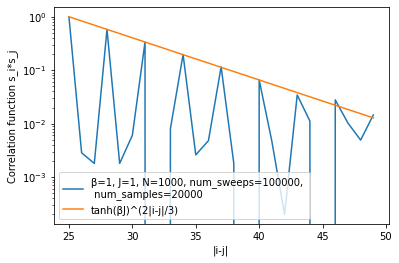

In [11]:
plt.plot(index_list, corre[0], label="β=1, J=1, N=1000, num_sweeps=100000, \n num_samples=20000")
plt.plot(index_list, [np.tanh(1)**(2*(abs(N//2 - r))/3) for r in range(N//2, N)], label="tanh(βJ)^(2|i-j|/3)")
plt.xlabel("|i-j|")
plt.ylabel("Correlation function s_i*s_j")
plt.yscale("log")
plt.legend()
plt.savefig("out.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


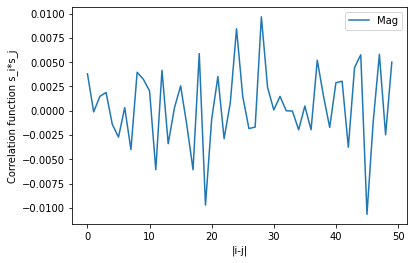

In [9]:
plt.plot([i for i in range(N)], mag[0], label="Mag")
plt.xlabel("|i-j|")
plt.ylabel("Correlation function s_i*s_j")
plt.legend()
plt.savefig("out2.eps")